# Predicting Customer Annual Spending Using E-commerce Behavioral Metrics: A Linear Regression Approach

## Step 1: Problem Identification
* We want to predict the Yearly Amount Spent by
customers based on their usage metrics, such as Avg. Session Length, Time on App, Time on Website, and Length of Membership.

* This will involve building a linear regression model to understand the relationship between these factors and the annual spending of the customers. The model can then be used to make predictions for new customers, which could be valuable for your employer to optimize marketing and sales strategies.






In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from google.colab import files
uploaded = files.upload()


Saving Ecommerce Customers to Ecommerce Customers (2)


In [7]:
df = pd.read_csv('Ecommerce Customers')

## Step 2: Data Analysis

In [22]:
# Summary statistics
print("\nSummary statistics of the dataset:\n", df.describe())


Summary statistics of the dataset:
        Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max           

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [24]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64



Correlation with Yearly Amount Spent:
 Avg. Session Length     0.355088
Time on App             0.499328
Time on Website        -0.002641
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64


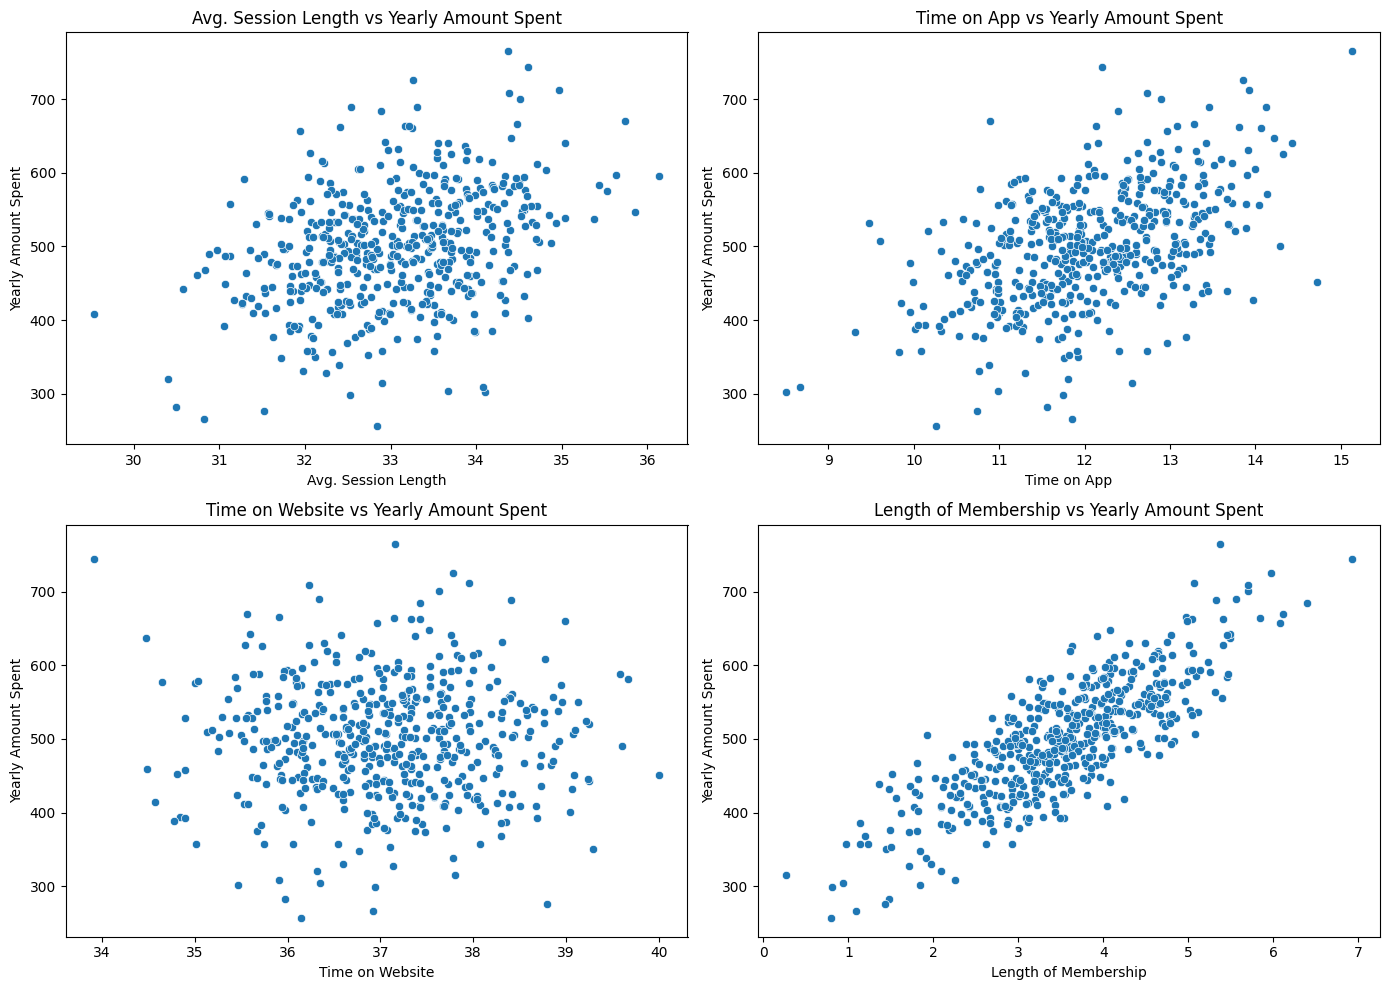

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Selecting only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_df.corr()
print("\nCorrelation with Yearly Amount Spent:\n", correlation_matrix["Yearly Amount Spent"])

# Visualizing relationships
plt.figure(figsize=(14, 10))

# Scatter plot: Avg. Session Length vs Yearly Amount Spent
plt.subplot(2, 2, 1)
sns.scatterplot(x='Avg. Session Length', y='Yearly Amount Spent', data=df)
plt.title('Avg. Session Length vs Yearly Amount Spent')

# Scatter plot: Time on App vs Yearly Amount Spent
plt.subplot(2, 2, 2)
sns.scatterplot(x='Time on App', y='Yearly Amount Spent', data=df)
plt.title('Time on App vs Yearly Amount Spent')

# Scatter plot: Time on Website vs Yearly Amount Spent
plt.subplot(2, 2, 3)
sns.scatterplot(x='Time on Website', y='Yearly Amount Spent', data=df)
plt.title('Time on Website vs Yearly Amount Spent')

# Scatter plot: Length of Membership vs Yearly Amount Spent
plt.subplot(2, 2, 4)
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=df)
plt.title('Length of Membership vs Yearly Amount Spent')

plt.tight_layout()
plt.show()


### The scatter plots provide the following insights:

   * Avg. Session Length vs Yearly Amount Spent:
        There is a moderate positive correlation. As the average session length increases, the yearly amount spent tends to increase, though the relationship is not very strong.

   * Time on App vs Yearly Amount Spent:
        A positive correlation is evident. Customers who spend more time on the app tend to spend more money annually.

   * Time on Website vs Yearly Amount Spent:
        There's almost no visible relationship, which aligns with the near-zero correlation observed earlier.

   * Length of Membership vs Yearly Amount Spent:
        This plot shows the strongest positive correlation. Customers who have been members for longer tend to spend more money yearly.

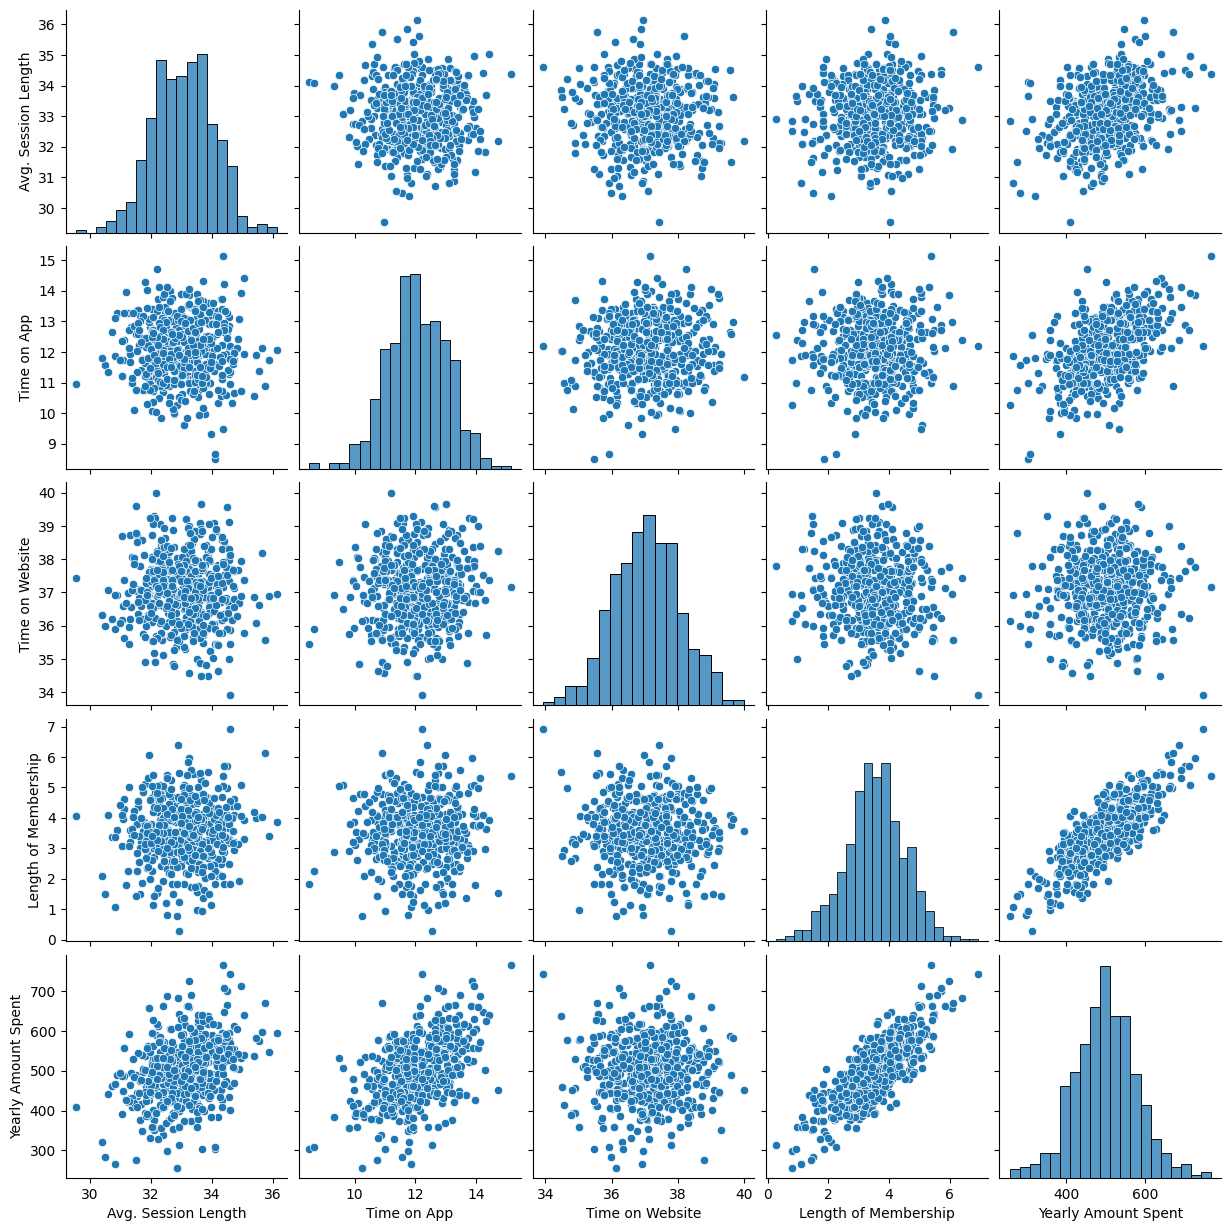

In [32]:
sns.pairplot(df)

## Step 3:  Data Preparation for Modeling
In this step, we will:

   * Select the relevant features for the linear regression model.
   * Split the data into training and testing sets to evaluate the model's performance.
   * Standardize/normalize the features (if necessary) to improve the model's performance.

Starting by selecting the features and splitting the dataset. The target variable is **Yearly Amount Spent**, and the features we'll use are:

    Avg. Session Length
    Time on App
    Time on Website
    Length of Membership

## Data Split

In [33]:
from sklearn.model_selection import train_test_split

# Select features and target variable
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (400, 4)
Testing features shape: (100, 4)
Training labels shape: (400,)
Testing labels shape: (100,)


The data has been successfully split:

    Training Set: 400 samples with 4 features.
    Testing Set: 100 samples with 4 features.

## Train the Linear Regression Model
We'll proceed to train a linear regression model using the training data and evaluate its performance on the testing data. This will involve:

* Training the model.
* Making predictions on the test set.
* Evaluating the model using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 8.558441885315231
Mean Squared Error (MSE): 109.8637411839399
R-squared (R²): 0.9778130629184127


The model performs quite well, as indicated by the high R² value, which shows that the model explains a large portion of the variance in the target variable.

                      Coefficient
Avg. Session Length     25.596259
Time on App             38.785346
Time on Website          0.310386
Length of Membership    61.896829
Intercept: -1044.2574146365582


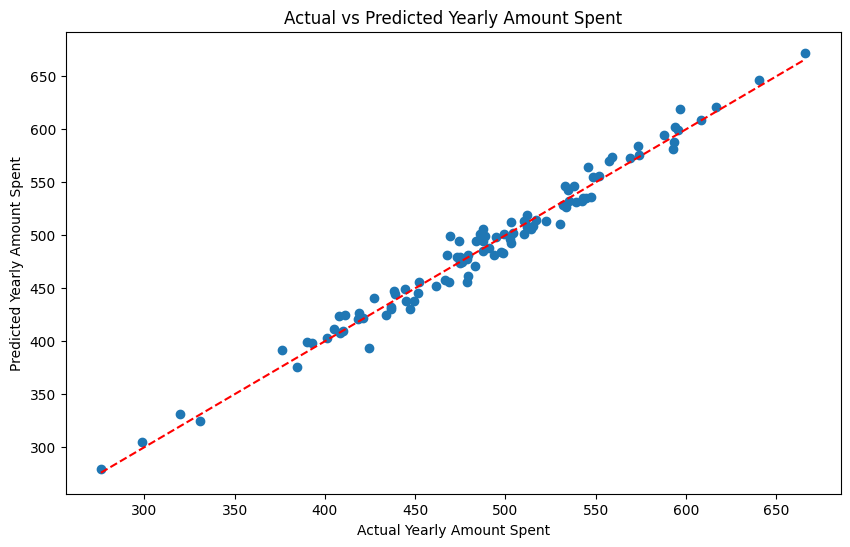

In [36]:
# Retrieve the model coefficients and intercept
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
intercept = model.intercept_

# Print the coefficients
print(coefficients)
print(f'Intercept: {intercept}')

# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Yearly Amount Spent')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.show()

The scatter plot of actual vs. predicted values shows that the predictions are closely aligned with the actual values, indicating that the model is performing well.

## Conclusion:

  * Mobile App: The significant coefficient suggests that improvements in the mobile app might be a more effective way to boost spending compared to website improvements.
  * Website: Given the low impact of website time on spending, major investments in website development might not be as effective.
  * Membership: Since Length of Membership has the largest coefficient, focusing on customer retention and loyalty programs could be the most impactful strategy for increasing yearly spending.

## Recommendations:

  * Prioritize Mobile App Development: Enhancing the mobile app experience could lead to higher customer spending.
  * Focus on Membership Retention: Invest in programs that encourage long-term membership, as this has the greatest impact on spending.
  * Consider Website Improvements: Only if they significantly improve user experience or serve as a complementary tool to the mobile app.

# More Exploration


## Residual Analysis
* Check for any patterns in the residuals to see if the model has missed any key relationships.
   * Checking for homoscedasticity: The residuals should have constant variance.
   * Checking for normality: The residuals should be normally distributed.
   * Identifying outliers: Large residuals may indicate outliers or influential data points.
   * Assessing any patterns: The residuals should not show any clear patterns when plotted against the predicted values.

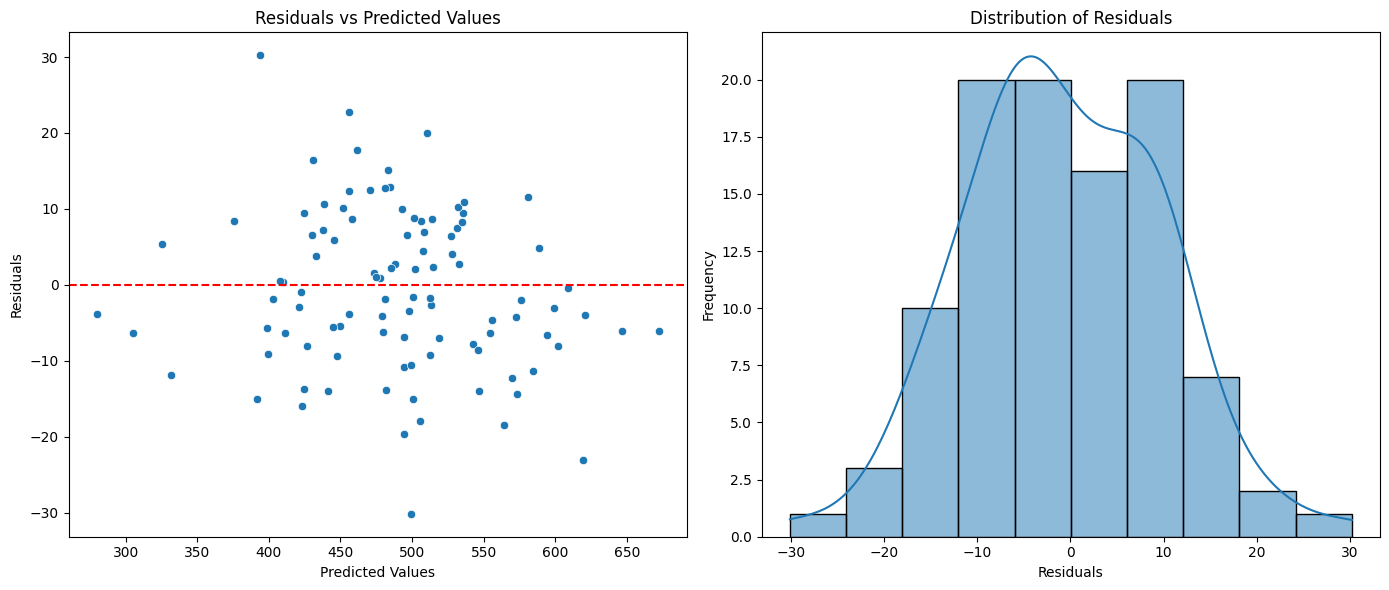

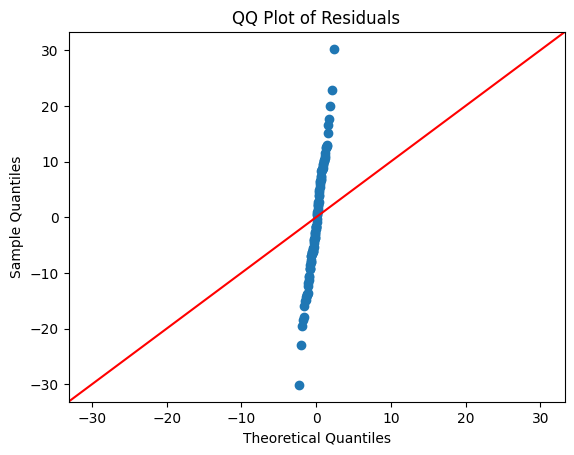

In [37]:
import statsmodels.api as sm
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals against the predicted values
plt.figure(figsize=(14, 6))

# Residuals vs Predicted Values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Plot the distribution of the residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Check for normality of residuals using a QQ plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot of Residuals')
plt.show()

## Residual Analysis Results:

1.    **Residuals vs Predicted Values:**
        The scatter plot shows that the residuals are spread fairly evenly around zero across all predicted values, indicating that the model does not have clear patterns of bias. However, there might be a slight funnel shape, suggesting a minor issue with homoscedasticity, where residual variance increases with predicted values.

2.   **Distribution of Residuals:**
        The histogram of residuals appears roughly normal, which is good. This indicates that the residuals are approximately normally distributed, fulfilling one of the key assumptions of linear regression.

3.    **QQ Plot of Residuals:**
        The QQ plot shows that the residuals mostly fall along the line, indicating that the residuals are approximately normally distributed. Any deviations from the line are relatively minor, suggesting no significant departures from normality.

## Polynomial Regression Model Evaluation


In [39]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Make predictions on the testing data
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluate the polynomial regression model
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Output the performance metrics
print(f"Mean Absolute Error (MAE): {mae_poly}")
print(f"Mean Squared Error (MSE): {mse_poly}")
print(f"R-squared (R²): {r2_poly}")

Mean Absolute Error (MAE): 8.83619835085809
Mean Squared Error (MSE): 116.06979147186223
R-squared (R²): 0.976559753630203


* The performance metrics indicate that the polynomial regression model does not perform as well as the original linear regression model with interaction terms. The slight decrease in R² and the increase in MAE and MSE suggest that the added complexity of the polynomial terms does not provide a better fit to the data.
* This might indicate that the relationships between the features and the target variable are more linear than non-linear, or that the added polynomial terms are introducing unnecessary complexity, leading to overfitting.